<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/19.%20Machine%20Learning/Learn%20-%20Neural%20Network%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn - Neural Network Classifier
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Importing Libraries

In [ ]:
# basic
import pandas as pd
import numpy as np
import scipy.stats as stats

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading Dataset

In [ ]:
path = 'https://raw.githubusercontent.com/ganjar87/data_science_practice/main/BankChurners.csv'

data = pd.read_csv(path)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
data.drop(['CLIENTNUM'], axis=1, inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


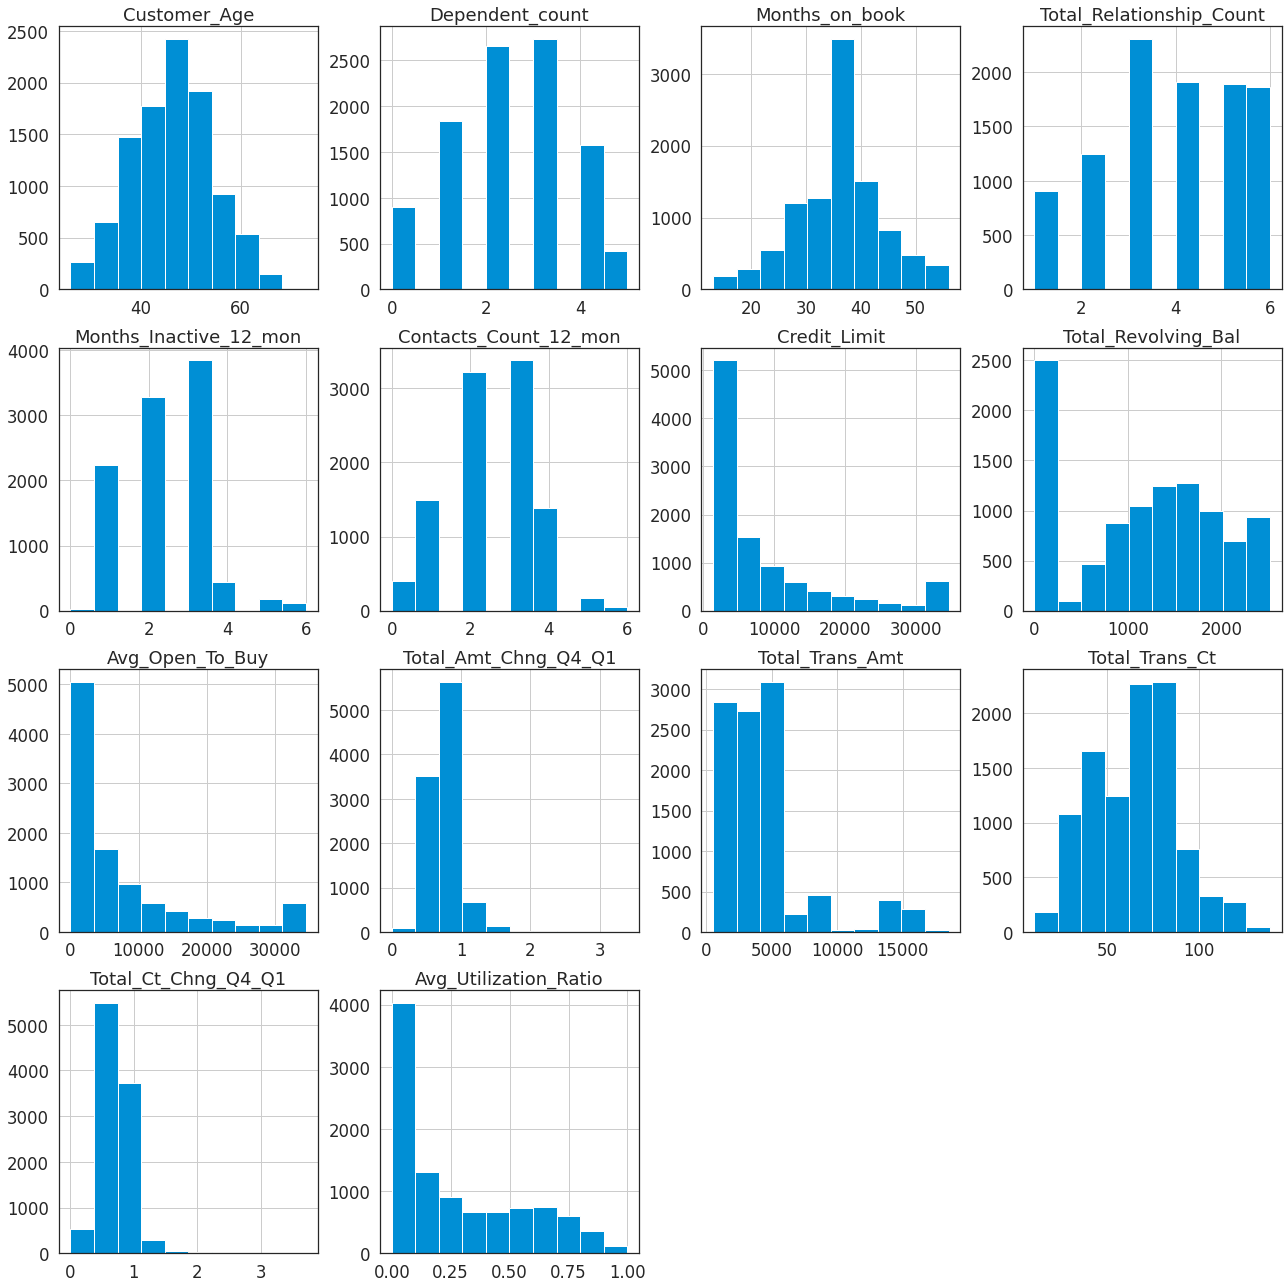

In [ ]:
data.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

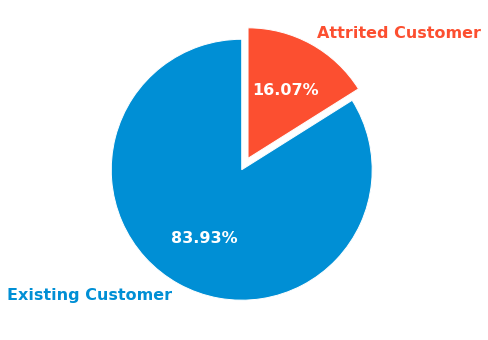

In [ ]:
pie_data = data['Attrition_Flag'].value_counts(normalize=True)
pie_label = pie_data.index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.show()

# Data Preprocessing

In [ ]:
column_categorical = list(data.select_dtypes(include=['object', 'bool']).columns)
column_categorical

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

## Train - Test Split

In [ ]:
data_X = data.drop(['Attrition_Flag'], axis=1)
data_y = data['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

## Feature Encoding

### Label Encoding

In [ ]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

### Ordinal Encoding

In [ ]:
X_train_encode = X_train.copy()
X_test_encode = X_test.copy()

column_edu = ['Unknown', 'Uneducated', 'High School', 'College',
              'Graduate', 'Post-Graduate', 'Doctorate']

column_income = ['Unknown', 'Less than $40K', '$40K - $60K',
                 '$60K - $80K', '$80K - $120K', '$120K +']

column_card = ['Blue', 'Silver', 'Gold', 'Platinum']

column_ordinal = ['Education_Level', 'Income_Category', 'Card_Category']

oe = OrdinalEncoder(categories=[column_edu, column_income, column_card])

oe.fit(X_train_encode[column_ordinal])

X_train_encode[column_ordinal] = oe.transform(X_train_encode[column_ordinal])
X_test_encode[column_ordinal] = oe.transform(X_test_encode[column_ordinal])

In [ ]:
X_train_encode[['Education_Level', 'Income_Category', 'Card_Category']]

,Education_Level,Income_Category,Card_Category
678,4.0,3.0,0.0
7524,1.0,0.0,0.0
8725,2.0,1.0,0.0
10029,4.0,2.0,2.0
1383,0.0,2.0,0.0
...,...,...,...
509,1.0,0.0,0.0
8365,2.0,2.0,0.0
7169,4.0,1.0,0.0
6113,0.0,0.0,0.0


### One Hot Encoding

In [ ]:
column_nominal = ['Gender', 'Marital_Status']

ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_nominal])

# for col in column_nominal:
X_train_ohe = ohe.transform(X_train[column_nominal])
X_test_ohe = ohe.transform(X_test[column_nominal])

column_ohe = ohe.get_feature_names_out(column_nominal)
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

X_train_encode_ohe = pd.concat([X_train_encode.drop(columns=column_nominal), X_train_ohe_df], axis=1)
X_test_encode_ohe = pd.concat([X_test_encode.drop(columns=column_nominal), X_test_ohe_df], axis=1)

## Feature Scaling

In [ ]:
X_train_scale = X_train_encode_ohe.copy()
X_test_scale = X_test_encode_ohe.copy()

for i in list(X_train_scale.columns):
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

## SMOTE

In [ ]:
smote = SMOTE(random_state=0)

X_train_res, y_train_res = smote.fit_resample(X_train_scale, y_train_encode)

# Neural Network

## Training

In [ ]:
model = MLPClassifier(max_iter=1000)

model.fit(X_train_res, y_train_res)

MLPClassifier(max_iter=1000)

## Model Evaluation

In [ ]:
y_pred = model.predict(X_test_scale)

### Classification Report

In [ ]:
print(classification_report(y_test_encode, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.756     0.832     0.792       488
           1      0.967     0.949     0.958      2551

    accuracy                          0.930      3039
   macro avg      0.862     0.890     0.875      3039
weighted avg      0.933     0.930     0.931      3039



In [ ]:
print('Accuracy\t: ', round(accuracy_score(y_test_encode, y_pred),3))
print('Precision\t: ', round(precision_score(y_test_encode, y_pred),3))
print('Recall\t\t: ', round(recall_score(y_test_encode, y_pred),3))

Accuracy	:  0.93
Precision	:  0.967
Recall		:  0.949


### Confusion Matrix

In [ ]:
label = dict(zip([0,1], le.classes_))
label

{0: 'Attrited Customer', 1: 'Existing Customer'}

In [ ]:
cm = confusion_matrix(y_test_encode, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns=label, index=label, inplace=True)
df_cm

,Attrited Customer,Existing Customer
Attrited Customer,406,82
Existing Customer,131,2420


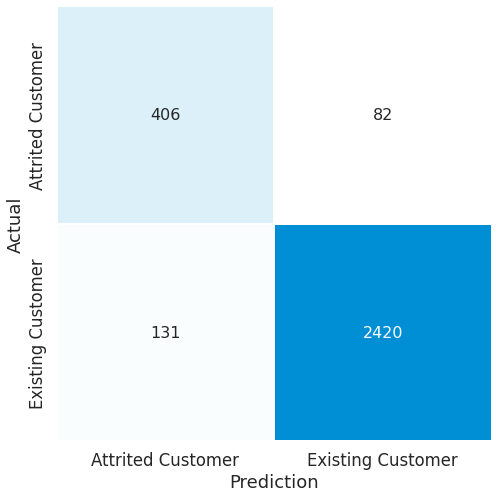

In [ ]:
cvals = [0, 1] # color locations
colors = [(1,1,1), (0/255, 143/255, 213/255)] # color values
mapping = list(zip(cvals, colors))
cmap = LinearSegmentedColormap.from_list("", mapping)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cm, fmt='.0f', cbar=False,
            cmap=cmap, linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()